In [1]:
%run Calculating.ipynb

In [2]:
%run Plotting.ipynb

In [3]:
R = np.array([
    [0., 0],
    [1, 1],
    [-1, 1],
])

In [4]:
springs = [(0,1),(0,2)]

In [5]:
H, l, v, D = calc(R, springs)

In [6]:
l.round(3)

array([-0. ,  0. ,  0.5,  0.5,  1.5,  1.5])

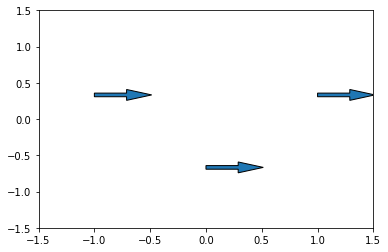

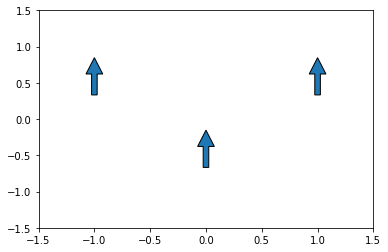

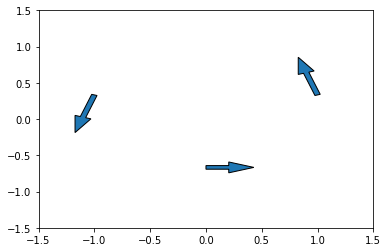

In [7]:
plot(R, D[:3], .5)

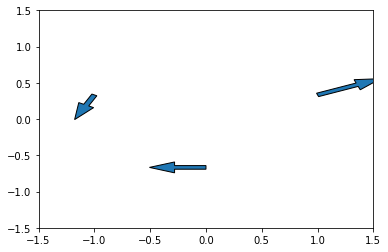

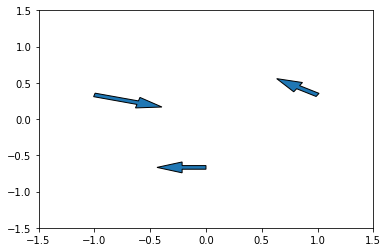

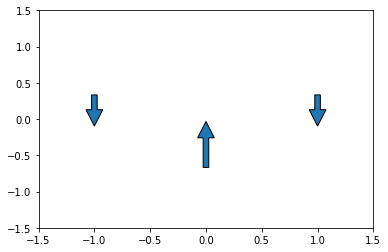

In [8]:
plot(R, D[3:], .5)

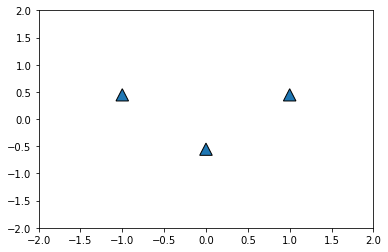

In [9]:
%matplotlib inline
sumBasis(R,D)

In [10]:
# def Energy(R, springs, displacements):
#     return .5 * np.sum([ ((displacements[stop] - displacements[start]) @ ((R[stop]-start)/np.linalg.norm(R[stop]-R[start])))**2 for (start,stop) in springs])

def Energy(R, springs, displacements):
    E = 0
    for i, (start,stop) in enumerate(springs):
        v = R[stop] - R[start]
        v /= np.linalg.norm(v)
        
        stretch = displacements[stop] - displacements[start]
        
        E += .5 * (stretch @ v)**2
    return E

In [13]:
Energy(R, springs, np.array([
    [-1., 1],
    [0, 0],
    [0, 0]
]))

0.9999999999999998

In [14]:
X = np.arange(-1,1,1e-2)
Y = np.arange(-1,1,1e-2)

In [15]:
Z = np.empty((len(X),len(Y)))

In [16]:
for i in range(len(X)):
    for j in range((len(Y))):
        Z[i,j] = Energy(R, springs, np.array([
            [X[i], Y[j]],
            np.zeros(2),
            np.zeros(2),
        ]))

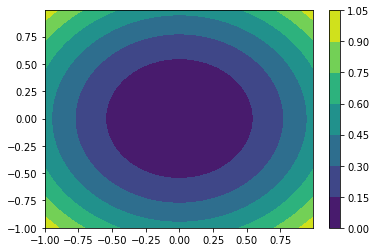

In [17]:
plt.contourf(X,Y,Z.T); plt.colorbar();

In [18]:
for i in range(len(X)):
    for j in range((len(Y))):
        Z[i,j] = Energy(R, springs, np.array([
            np.zeros(2),
            [X[i], Y[j]],
            np.zeros(2),
        ]))

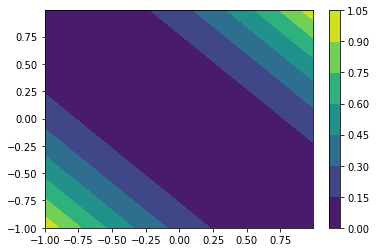

In [19]:
plt.contourf(X,Y,Z.T); plt.colorbar();

In [20]:
for i in range(len(X)):
    for j in range((len(Y))):
        Z[i,j] = Energy(R, springs, np.array([
            np.zeros(2),
            np.zeros(2),
            [X[i], Y[j]],
        ]))

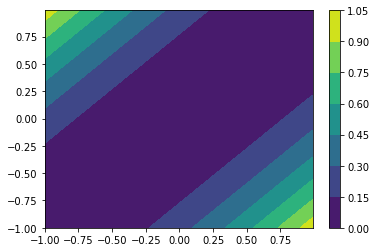

In [21]:
plt.contourf(X,Y,Z.T); plt.colorbar();